In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('gm_merge.csv')
# Inspect the data
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24 14:30:00-04:00,35.150002,35.165001,35.130001,35.154999,35.154999,0
1,2022-05-24 14:31:00-04:00,35.154999,35.154999,35.110001,35.150002,35.150002,20825
2,2022-05-24 14:32:00-04:00,35.154999,35.200001,35.150002,35.200001,35.200001,15795
3,2022-05-24 14:33:00-04:00,35.200001,35.200001,35.174999,35.200001,35.200001,14615
4,2022-05-24 14:34:00-04:00,35.200001,35.215000,35.169998,35.215000,35.215000,15136


In [2]:
df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

#scaler1 = MinMaxScaler(feature_range=(0,1))
#scaled_data1 = scaler1.fit_transform(data_date)
# Create the training data set 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

In [3]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.49999979, 0.49944143, 0.50502794, 0.50502794, 0.50670385,
       0.50893854, 0.50111734, 0.50558672, 0.5117205 , 0.51005567,
       0.50670385, 0.50558672, 0.50223447, 0.49720675, 0.4953855 ,
       0.49273737, 0.48882677, 0.48770922, 0.48268149, 0.47988802,
       0.47709498, 0.4804468 , 0.48379862, 0.47932967, 0.47709498,
       0.47597743, 0.47932967, 0.48100558, 0.48268149, 0.48100558,
       0.48547496, 0.48603331, 0.48379862, 0.49497206, 0.49329615,
       0.50055857, 0.49854722, 0.49329615, 0.49162024, 0.49050268,
       0.49106146, 0.49217859, 0.48770922, 0.48603331, 0.48268149,
       0.47988802, 0.4804468 , 0.48268149, 0.48100558, 0.47877089,
       0.47262561, 0.48156436, 0.48156436, 0.48268149, 0.48324027,
       0.48491618, 0.49050268, 0.49441328, 0.48603331, 0.48547496])]
[0.48435739831701685]

[array([0.49999979, 0.49944143, 0.50502794, 0.50502794, 0.50670385,
       0.50893854, 0.50111734, 0.50558672, 0.5117205 , 0.51005567,
       0.50670385, 0.50558672, 0.50

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import array
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True, activation='relu' ))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
413/413 [==============================] - 183s 275ms/step - loss: 0.0065
Epoch 2/100
413/413 [==============================] - 128s 309ms/step - loss: 0.0011
Epoch 3/100
413/413 [==============================] - 135s 328ms/step - loss: 7.3271e-04
Epoch 4/100
413/413 [==============================] - 133s 322ms/step - loss: 5.1815e-04
Epoch 5/100
413/413 [==============================] - 132s 320ms/step - loss: 4.8599e-04
Epoch 6/100
413/413 [==============================] - 141s 341ms/step - loss: 3.9129e-04
Epoch 7/100
413/413 [==============================] - 127s 308ms/step - loss: 4.1999e-04
Epoch 8/100
413/413 [==============================] - 137s 333ms/step - loss: 2.7942e-04
Epoch 9/100
413/413 [==============================] - 105s 256ms/step - loss: 2.6479e-04
Epoch 10/100
413/413 [==============================] - 106s 256ms/step - loss: 2.5079e-04
Epoch 11/100
413/413 [==============================] - 121s 293ms/step - loss: 2.5834e-04
Epoch 12/100
413

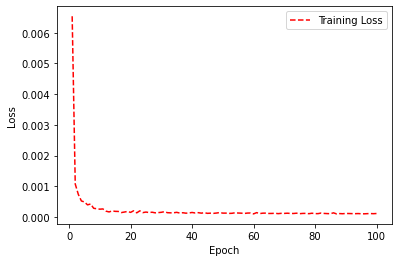

In [6]:

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [7]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.13510069856389492

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3'])

<ipython-input-9-4e3dab888026>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.09587475489676811

In [11]:
valid_3['Predictions3']

6664    32.044109
6665    32.030624
6666    31.999449
6667    31.955561
6668    31.913658
          ...    
7009    32.710011
7010    32.685390
7011    32.678448
7012    32.667747
7013    32.653629
Name: Predictions3, Length: 350, dtype: float32